In [1]:
!pip install opencv-python

In [3]:
import os
import cv2

In [5]:
main_folder_path = 'E:/IBM AI Engineering Professional/Introduction to computer vision'

In [7]:
allowed_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.gif'}

In [9]:
# Define the subdirectories
subfolders = ['stop', 'not_stop']

for subfolder in subfolders:
    folder_path = os.path.join(main_folder_path, subfolder)
    
    # Get list of files in the subfolder and filter by allowed extensions
    image_files = [f for f in os.listdir(folder_path) 
                   if os.path.isfile(os.path.join(folder_path, f)) and os.path.splitext(f)[1].lower() in allowed_extensions]
    
    # Count the number of image files
    num_images = len(image_files)
    
    print(f"Number of images in '{subfolder}' folder: {num_images}")

Number of images in 'stop' folder: 97
Number of images in 'not_stop' folder: 100


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
!pip install opencv-python tensorflow scikit-learn

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [31]:
# Initialize data and labels lists
data = []
labels = []

# Read images from subdirectories
for label, subfolder in enumerate(subfolders):
    folder_path = os.path.join(main_folder_path, subfolder)
    
    image_files = [f for f in os.listdir(folder_path) 
                   if os.path.isfile(os.path.join(folder_path, f)) and os.path.splitext(f)[1].lower() in allowed_extensions]
    
    for image_file in image_files:
        img_path = os.path.join(folder_path, image_file)
        img = cv2.imread(img_path)
        
        if img is not None:
            # Resize the image to a fixed size (e.g., 64x64)
            img = cv2.resize(img, (64, 64))
            data.append(img)
            labels.append(label)
        else:
            print(f"Failed to read image {img_path}")

# Convert data and labels to numpy arrays
data = np.array(data, dtype='float32')
labels = np.array(labels)

# Normalize the pixel values to the range [0, 1]
data /= 255.0

# Check the lengths of data and labels
print(f"Number of images: {len(data)}")
print(f"Number of labels: {len(labels)}")

Number of images: 197
Number of labels: 197


In [33]:
# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(subfolders))

# Ensure the lengths are consistent before splitting
if len(data) == len(labels):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
else:
    raise ValueError("The number of images and labels are inconsistent.")


In [35]:
# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(subfolders), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\shash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454,082 (9.36 MB)

 Trainable params: 2,454,082 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.5981 - loss: 0.6826 - val_accuracy: 0.5250 - val_loss: 0.8984
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5238 - loss: 0.8126 - val_accuracy: 0.5000 - val_loss: 0.6814
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6234 - loss: 0.6405 - val_accuracy: 0.8750 - val_loss: 0.5566
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6787 - loss: 0.5777 - val_accuracy: 0.8000 - val_loss: 0.4510
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8130 - loss: 0.4552 - val_accuracy: 0.8250 - val_loss: 0.4010
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8195 - loss: 0.3636 - val_accuracy: 0.7500 - val_loss: 0.3890
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8894 - loss: 0.2815 - val_accuracy: 0.7750 - val_loss: 0.4088
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8508 - loss: 0.3190 - val_accuracy: 0.7000 - val_loss: 0.6512


In [39]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8958 - loss: 0.3714
Test Accuracy: 87.50%


In [73]:
# Make predictions on the test set
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


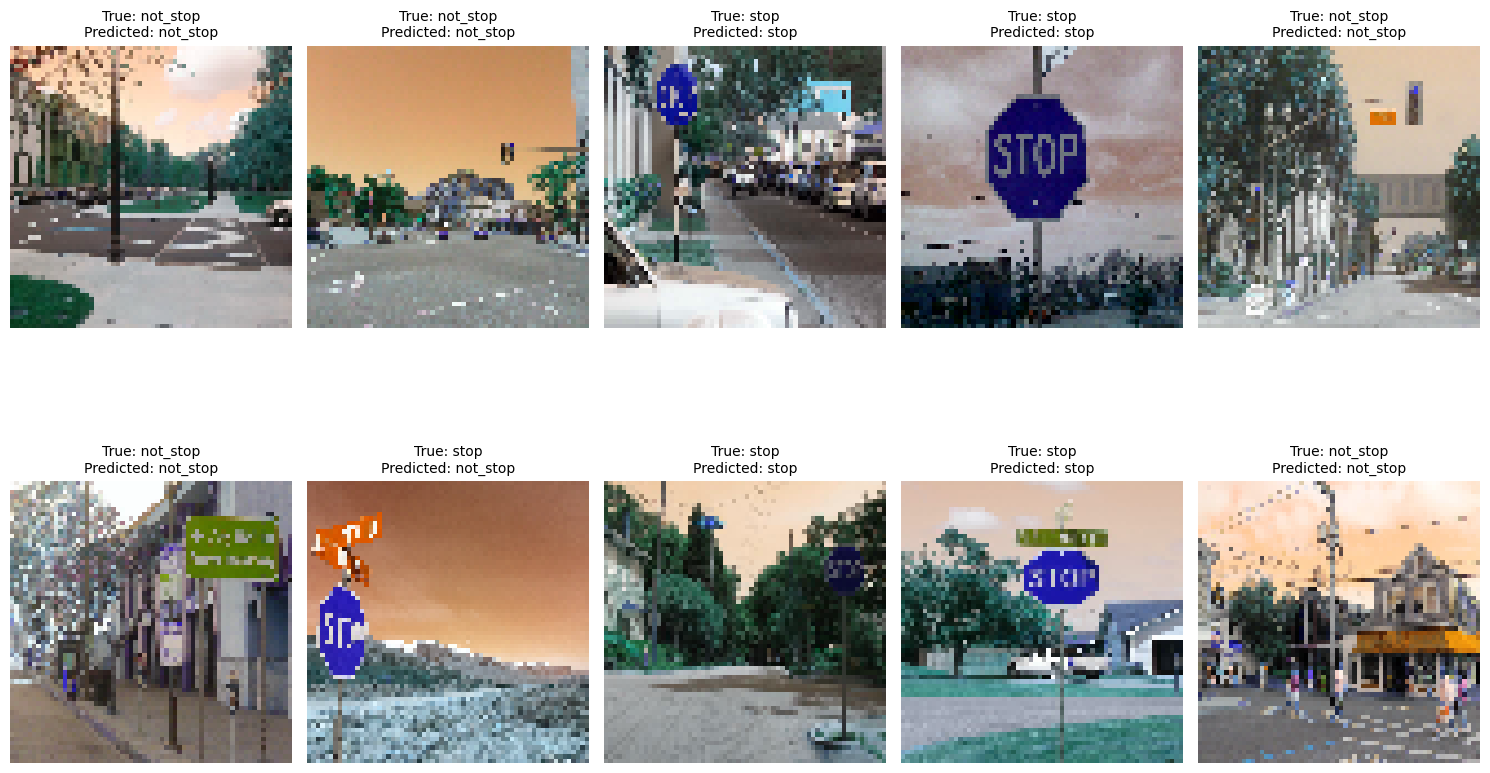

In [79]:
import matplotlib.pyplot as plt

# Function to display images with their true and predicted labels
def display_examples(images, true_labels, predictions, num_examples=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_examples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_label = subfolders[np.argmax(true_labels[i])]
        predicted_label = subfolders[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}', fontsize=10)
    plt.tight_layout()
    plt.show()

# Display 10 examples
display_examples(X_test, y_test, predictions)

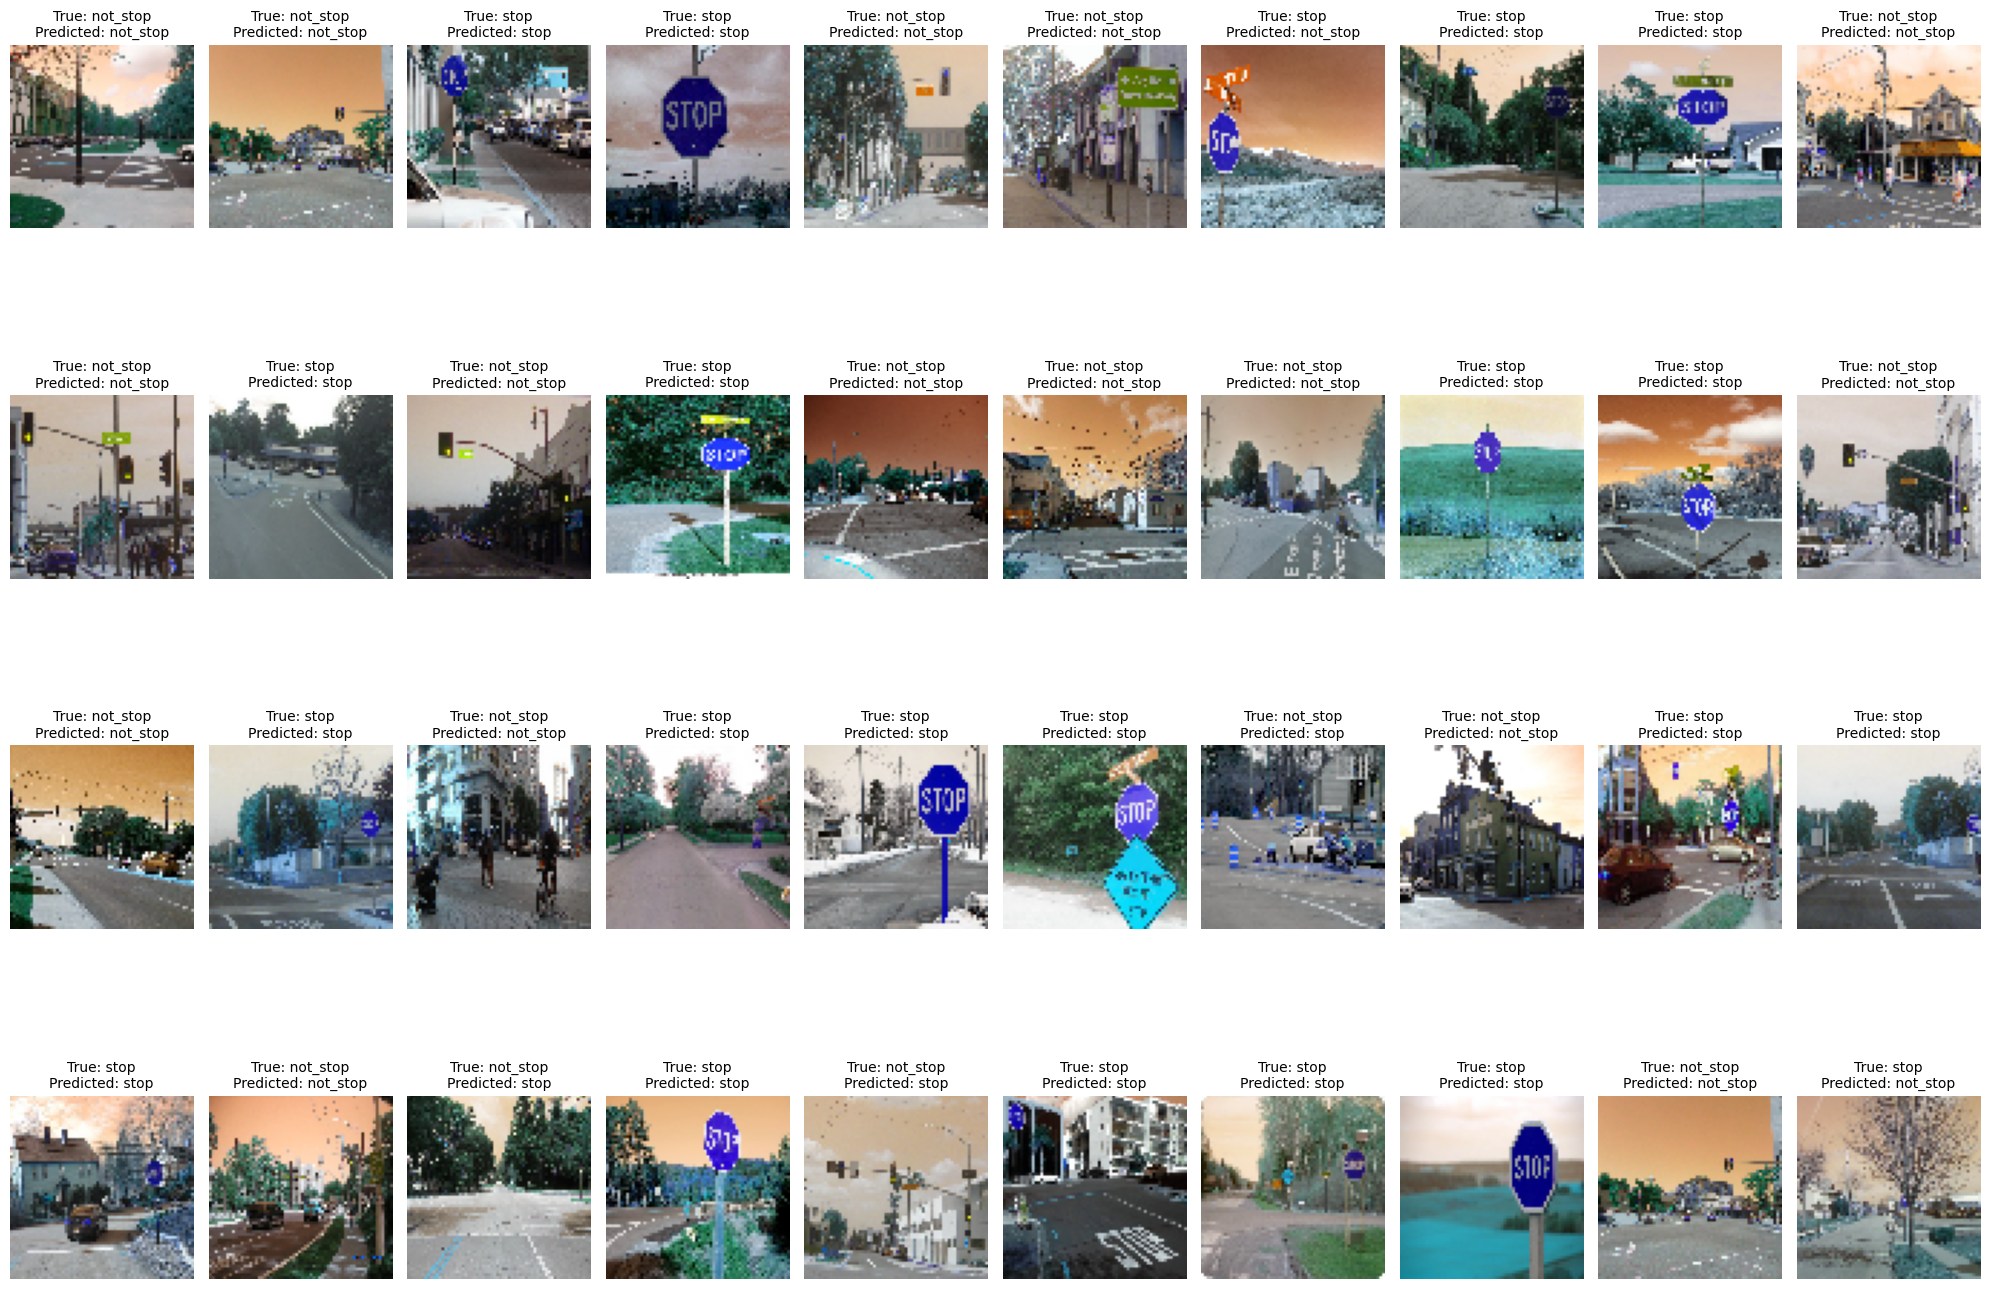

In [81]:
import matplotlib.pyplot as plt

# Function to display images with their true and predicted labels
def display_examples(images, true_labels, predictions, num_examples=10):
    plt.figure(figsize=(20, 15))  # Adjust figure size as needed
    for i in range(num_examples):
        plt.subplot(4, 10, i + 1)  # Adjust subplot layout for 40 examples
        plt.imshow(images[i])
        plt.axis('off')
        true_label = subfolders[np.argmax(true_labels[i])]
        predicted_label = subfolders[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}', fontsize=10)
    plt.tight_layout()
    plt.show()

# Display 40 examples
display_examples(X_test, y_test, predictions, num_examples=40)
